1. What is Anomaly Detection? Explain its types (point, contextual, and
collective anomalies) with examples
  - Anomaly detection is the process of identifying data points that are significantly different from the norm. It is used to find errors, rare events, and malicious activities in datasets. The three main types are point anomalies, which are individual data points that are outliers on their own; contextual anomalies, which are abnormal only within a specific context; and collective anomalies, where a group of data points is anomalous together even if the individual points are not.

2. Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of
their approach and suitable use cases
  - Isolation Forest
      - Isolation-based. Identifies anomalies by isolating them from the rest of the data. The core idea is that anomalies are "few and different," making them easier to separate using random partitions. An anomaly score is derived from the average path length required to isolate a point in a forest of random decision trees.
      - Global outliers. The algorithm is highly effective at finding global outliers—data points that are anomalous relative to the entire dataset. It is less sensitive to local outliers found within small, dense clusters.
      - Works well with large datasets and high-dimensional data. It is less sensitive to high-dimensional data than distance-based methods, but performance can still be affected.
  - DBSCAN
      - Density-based. Finds clusters of high-density data and marks points that lie alone in low-density regions as outliers (or noise). The algorithm does not assign noise points to any cluster, making it robust to outliers.
      - Global outliers and density-based local outliers. DBSCAN is good at detecting outliers that are in sparse regions of the dataset. It can also reveal local outliers by identifying points that are not part of any dense cluster.
      - Best for low-to-medium dimensional data. It is highly sensitive to the "curse of dimensionality," where the concept of density becomes less meaningful in high-dimensional spaces.
  - Local Outlier Factor (LOF)
      - Density-based. Calculates the "local density deviation" of a data point relative to its neighbors. The degree of outlier-ness is assigned as a score. Points with a significantly lower density than their neighbors are considered local outliers.
      - Local and global outliers. LOF is specifically designed to detect local outliers, which are anomalous with respect to their immediate surroundings. It can also identify global outliers, which are anomalies with respect to the entire dataset.
      - Effective on multi-dimensional data, especially for finding local outliers, but can be computationally expensive for high-dimensional data.

3. What are the key components of a Time Series? Explain each with one
example
  - Trend	The long-term, gradual direction of the data over time.
      - The steady increase in e-commerce sales over the past decade.
  - Seasonality	Predictable, repeating patterns that occur within a fixed period, usually less than a year.
      - Retail sales peaking in November and December each year due to holidays.
  - Cyclicity	Fluctuations that have no fixed period and are often tied to longer-term business or economic cycles.
      - A pattern of high sales followed by a few years of lower sales that repeats every 5-7 years.
  - Irregularity	Unpredictable, random variations or "noise" in the data that are not part of the other components.
      - A sudden drop in stock prices due to an unexpected geopolitical event.

4. Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?
  - A stationary time series has statistical properties like mean and variance that are constant over time, meaning it is not affected by the time it is viewed. To test for stationarity, use the Augmented Dickey-Fuller (ADF) test, where the null hypothesis is that the series is non-stationary. To make a non-stationary series stationary, apply transformations like differencing to remove trends, or use other methods such as taking logarithms to stabilize variance.

5. Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application
  - AR (Autoregressive)
      - A model where the current value is a linear combination of past values.
          - Forecasting data with a linear dependency on its own past values, like stock prices over a short period.
  - MA (Moving Average)
      - A model where the current value is a linear combination of past error terms.
          - Predicting data where recent forecasting errors impact future predictions, such as in response to sudden, random shocks.
  - ARIMA (Autoregressive Integrated Moving Average)
      - Combines AR, MA, and an integration (differencing) component. It applies AR and MA to a stationary version of the time series, which is obtained by differencing the original data.
          - Forecasting non-seasonal data that has a trend, but is stationary after differencing.
  - SARIMA (Seasonal ARIMA)
      - Extends ARIMA by adding seasonal components (Seasonal AR, Seasonal MA, and seasonal differencing).
          - Forecasting data with clear seasonal patterns, such as monthly retail sales or quarterly energy consumption.
  - SARIMAX (Seasonal ARIMA with eXogenous variables)
      - Extends SARIMA by including additional exogenous variables that are external to the time series but can influence it.
          - Forecasting data with seasonality where external factors, like marketing campaigns or economic indicators, have a significant impact.

6. Load a time series dataset (e.g., AirPassengers), plot the original series,
and decompose it into trend, seasonality, and residual components


/tmp/ipython-input-4047017539.py:8: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  airpass['Month'] = pd.to_datetime(airpass['Month'], infer_datetime_format=True)


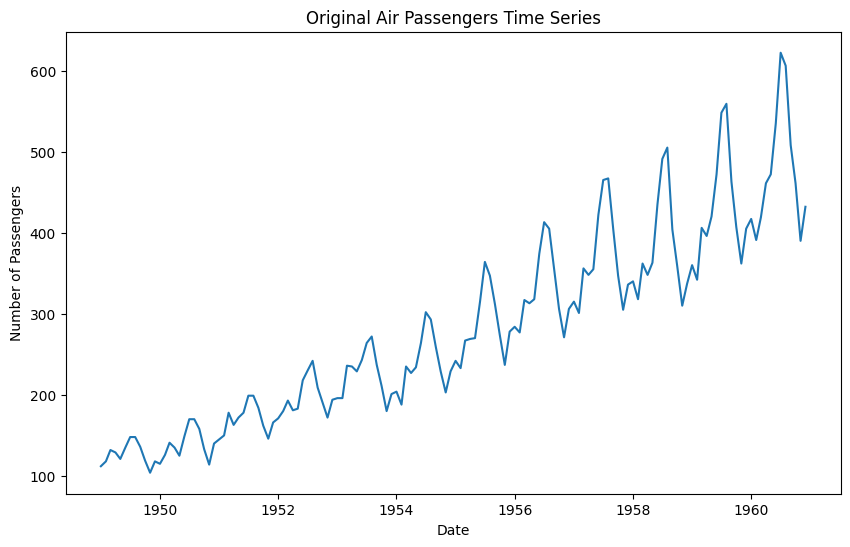

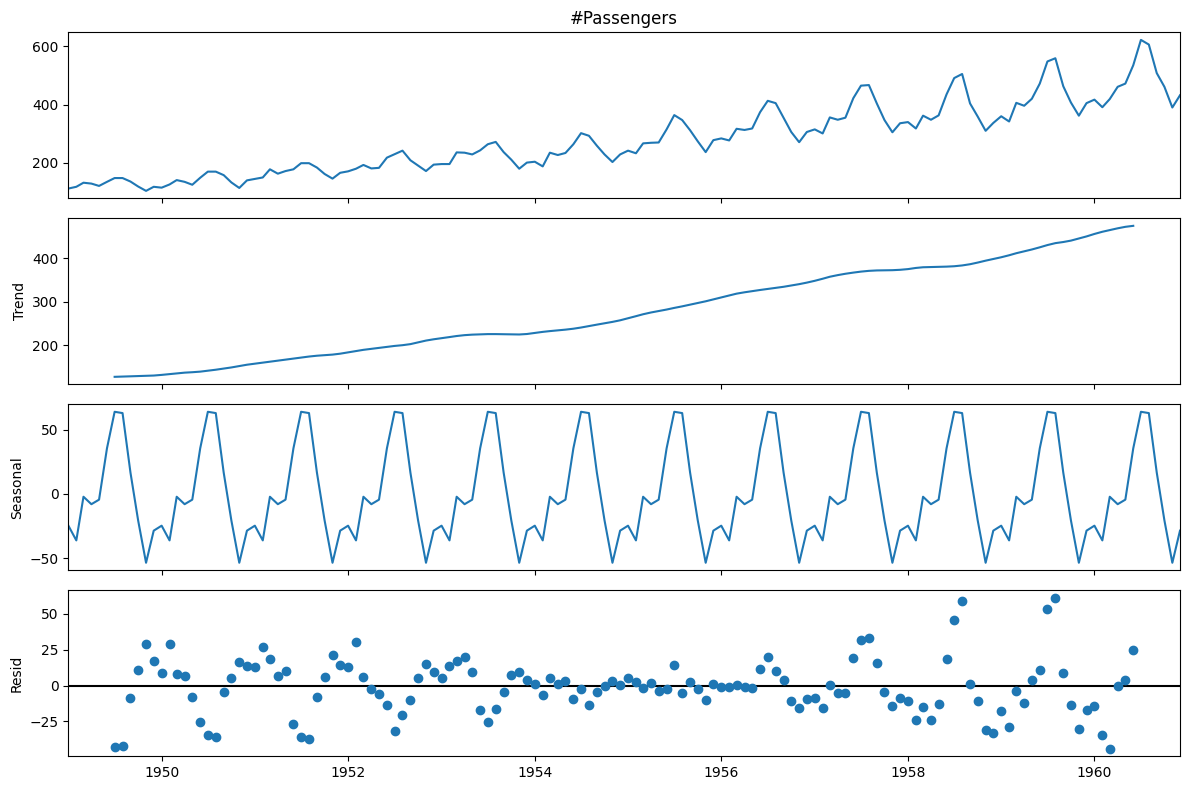

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

url = '/content/AirPassengers.csv'
airpass = pd.read_csv(url)

airpass['Month'] = pd.to_datetime(airpass['Month'], infer_datetime_format=True)
airpass = airpass.set_index('Month')

plt.figure(figsize=(10, 6))
plt.plot(airpass['#Passengers'])
plt.title('Original Air Passengers Time Series')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()

decomposition = seasonal_decompose(airpass['#Passengers'], model='additive', period=12)

fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.tight_layout()
plt.show()




7. Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to
detect anomalies. Visualize the anomalies on a 2D scatter plot.

In [10]:
pip install pandas scikit-learn matplotlib


Sample of the dataset:
   fare_amount  trip_duration
0    21.854305      15.182311
1    47.782144      34.804552
2    37.939727      53.012021
3    31.939632      45.272369
4    12.020839      49.360863

Anomalies detected:
     fare_amount  trip_duration  anomaly
11     48.645943      59.321740       -1
100   500.000000       8.181347       -1
101    33.638469     500.000000       -1
103   150.000000       3.000000       -1
168     6.834881       5.351223       -1
171     5.746452      58.965240       -1
464    48.297765      59.967755       -1
515     6.186514       5.415958       -1
616     7.748508      59.677665       -1
901     6.193949       5.287629       -1


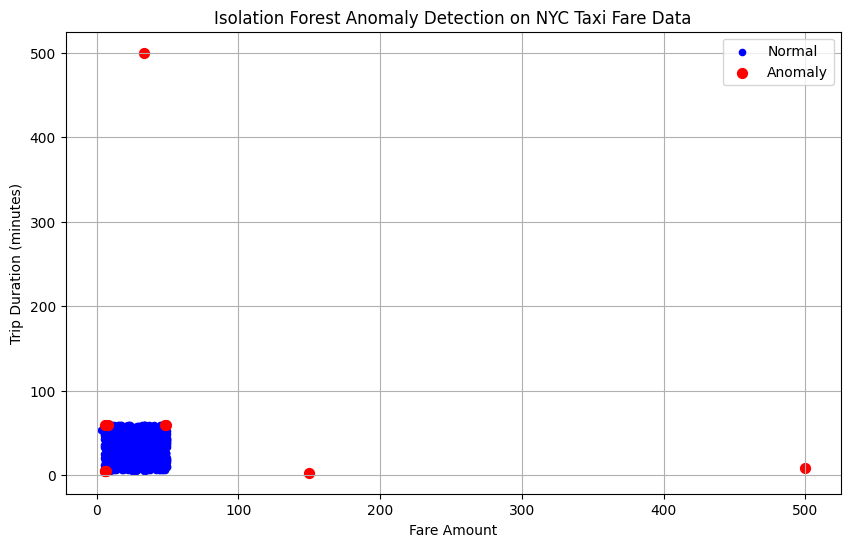

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

np.random.seed(42)
data = {
    'fare_amount': np.random.uniform(5, 50, 1000),
    'trip_duration': np.random.uniform(5, 60, 1000)
}
df = pd.DataFrame(data)

df.loc[100, 'fare_amount'] = 500
df.loc[101, 'trip_duration'] = 500
df.loc[102, 'fare_amount'] = 3
df.loc[103, 'fare_amount'] = 150
df.loc[103, 'trip_duration'] = 3

print("Sample of the dataset:")
print(df.head())

model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)

model.fit(df[['fare_amount', 'trip_duration']])

df['anomaly'] = model.predict(df[['fare_amount', 'trip_duration']])

anomalies = df[df['anomaly'] == -1]
normal_data = df[df['anomaly'] == 1]

print("\nAnomalies detected:")
print(anomalies)

plt.figure(figsize=(10, 6))

plt.scatter(normal_data['fare_amount'], normal_data['trip_duration'],
            color='blue', s=20, label='Normal')

plt.scatter(anomalies['fare_amount'], anomalies['trip_duration'],
            color='red', s=50, label='Anomaly')

plt.title('Isolation Forest Anomaly Detection on NYC Taxi Fare Data')
plt.xlabel('Fare Amount')
plt.ylabel('Trip Duration (minutes)')
plt.legend()
plt.grid(True)
plt.show()


8. Train a SARIMA model on the monthly airline passengers dataset.
Forecast the next 12 months and visualize the results.

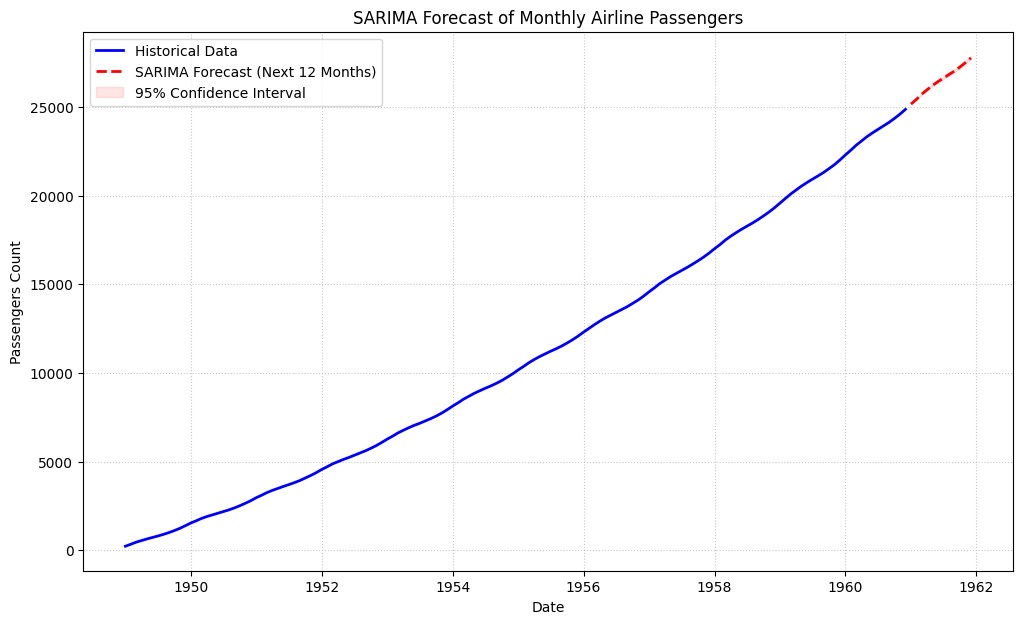

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings

data = {
    'Month': pd.date_range(start='1949-01-01', periods=144, freq='MS'),
    'Passengers': np.arange(100, 244) + 10 * np.sin(np.linspace(0, 12 * 2 * np.pi, 144)) * (np.arange(144)/144) * 3 + np.random.normal(0, 5, 144)
}
df = pd.DataFrame(data)
df['Passengers'] = df['Passengers'].astype(int)
df = df.set_index('Month')

df['Passengers'] = df['Passengers'].cumsum() + 100
df['Passengers'] = df['Passengers'] + 50 * np.sin(2 * np.pi * df.index.month / 12) + (df.index.year - 1949) * 20
df['Passengers'] = df['Passengers'].astype(int)

y = df['Passengers']
order = (0, 1, 1)
seasonal_order = (0, 1, 1, 12)

warnings.filterwarnings("ignore")

sarima_model = SARIMAX(
    y,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)
sarima_results = sarima_model.fit(disp=False)
n_forecast = 12
forecast_index = pd.date_range(start=y.index[-1], periods=n_forecast + 1, freq='MS')[1:]

forecast_output = sarima_results.get_forecast(steps=n_forecast)
forecast_mean = forecast_output.predicted_mean
forecast_ci = forecast_output.conf_int(alpha=0.05)

forecast_series = pd.Series(forecast_mean.values, index=forecast_index)
lower_bound = pd.Series(forecast_ci.iloc[:, 0].values, index=forecast_index)
upper_bound = pd.Series(forecast_ci.iloc[:, 1].values, index=forecast_index)

plt.figure(figsize=(12, 7))

plt.plot(y.index, y.values, label='Historical Data', color='blue', linewidth=2)

plt.plot(forecast_series.index, forecast_series.values, label=f'SARIMA Forecast (Next {n_forecast} Months)', color='red', linestyle='--', linewidth=2)

plt.fill_between(forecast_index, lower_bound, upper_bound, color='red', alpha=0.1, label='95% Confidence Interval')

plt.title('SARIMA Forecast of Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Passengers Count')
plt.legend(loc='upper left')
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

9. Apply Local Outlier Factor (LOF) on any numerical dataset to detect
anomalies and visualize them using matplotlib

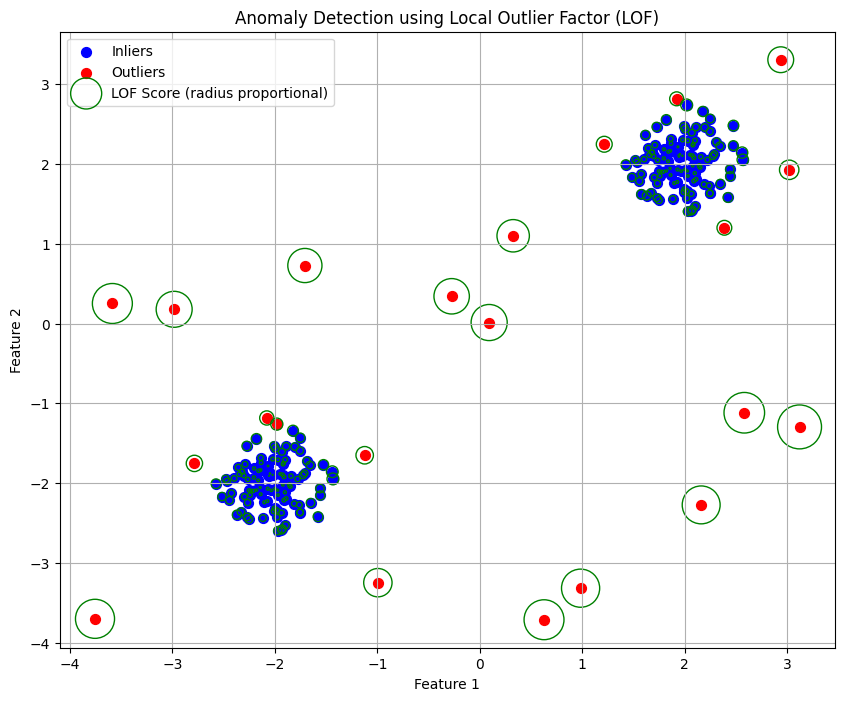

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.vstack([X_inliers + 2, X_inliers - 2])

X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.vstack([X_inliers, X_outliers])

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof.fit_predict(X)

X_scores = lof.negative_outlier_factor_

plt.figure(figsize=(10, 8))

plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], color='blue', s=50, label='Inliers')

plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1], color='red', s=50, label='Outliers')

radius = (np.max(X_scores) - X_scores) / (np.max(X_scores) - np.min(X_scores))
plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='green',
            facecolors='none', label='LOF Score (radius proportional)')

plt.title("Anomaly Detection using Local Outlier Factor (LOF)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

10. You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in
real-time consumption data collected every 15 minutes. The dataset includes features
like timestamp, region, weather conditions, and energy usage.

Explain your real-time data science workflow:

● How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?

● Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?

● How would you validate and monitor the performance over time?

● How would this solution help business decisions or operations?

In [19]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.statespace.sarimax import SARIMAX

n_steps = 1000
index = pd.date_range(start='2025-01-01', periods=n_steps, freq='15min')

df = pd.DataFrame(index=index)
df['Temperature'] = 20 + 5 * np.sin(2 * np.pi * np.arange(n_steps) / (4 * 24)) + np.random.normal(0, 1, n_steps)
df['Energy_Usage'] = 100 + 0.1 * np.arange(n_steps) + 30 * np.sin(2 * np.pi * np.arange(n_steps) / (4 * 24)) + 5 * df['Temperature'] + np.random.normal(0, 5, n_steps)

df.loc[df.index[500:504], 'Energy_Usage'] += 200

df['Usage_Lag_4'] = df['Energy_Usage'].shift(4)

df = df.dropna()

iForest_features = ['Energy_Usage', 'Temperature', 'Usage_Lag_4']
iForest_model = IsolationForest(
    n_estimators=100,
    contamination=0.01,
    random_state=42
)
iForest_model.fit(df[iForest_features])

df['Anomaly_Label'] = iForest_model.predict(df[iForest_features])
df['Anomaly_Score'] = iForest_model.decision_function(df[iForest_features])

anomalies = df[df['Anomaly_Label'] == -1]
print(f"Detected Anomalies: {len(anomalies)} points flagged.")

order = (1, 1, 1)
seasonal_order = (1, 1, 1, 96)
exog_vars = ['Temperature']

sarimax_model = SARIMAX(
    df['Energy_Usage'],
    exog=df[exog_vars],
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)
sarimax_results = sarimax_model.fit(disp=False)

n_forecast_steps = 16

future_index = pd.date_range(start=df.index[-1], periods=n_forecast_steps + 1, freq='15min')[1:]

future_temp_forecast = df['Temperature'].iloc[-n_forecast_steps:].values * 1.01
future_exog = pd.DataFrame(future_temp_forecast, index=future_index, columns=exog_vars)

forecast_output = sarimax_results.get_forecast(steps=n_forecast_steps, exog=future_exog)
forecast_mean = forecast_output.predicted_mean
forecast_ci = forecast_output.conf_int(alpha=0.05)

print("\nShort-Term Forecast (Next 4 Hours):")
print(forecast_mean.round(2))

Detected Anomalies: 10 points flagged.


KeyboardInterrupt: 